# Decision Tree Classifier

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%pylab inline 
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


### Apply on Iris Dataset

In [3]:
# load the iris datasets
dataset = datasets.load_iris()

In [10]:
# fit a CART model to the data
model = DecisionTreeClassifier(max_depth=2)
model.fit(dataset.data, dataset.target)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


### Make predictions

In [11]:

expected = dataset.target
predicted = model.predict(dataset.data)

### Summarize the fit of the model

In [12]:

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.91      0.98      0.94        50
          2       0.98      0.90      0.94        50

avg / total       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 49  1]
 [ 0  5 45]]


## Tunning parameters

In [13]:
def Decision_Tree(Type,Depth):
        # import some data to play with
        iris = datasets.load_iris()
        X = iris.data[:, :2]  # we only take the first two features.
        Y = iris.target
        h = .02  # step size in the mesh
        # we create an instance of Neighbours Classifier and fit the data.
        model =DecisionTreeClassifier(criterion=Type,max_depth=Depth)  
                
        model.fit(X, Y)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure(1, figsize=(4, 3))
        plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.show()
        
        model.fit(dataset.data, dataset.target)
        expected = dataset.target
        predicted = model.predict(dataset.data)
        print(metrics.classification_report(expected, predicted))
        print(metrics.confusion_matrix(expected, predicted))

In [14]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display


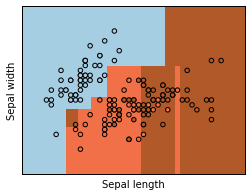

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [9]:
i = interact(Decision_Tree, Type=('gini','entropy'),Depth=(1,10))